In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings


y_train = pd.read_csv(r"D:\March 2024\PML\Day 14\Kaggle-TimesSeriesIOT\train_ML_IOT.csv")
print(y_train)

y_test = pd.read_csv(r"D:\March 2024\PML\Day 14\Kaggle-TimesSeriesIOT\test_ML_IOT.csv")
print(y_test)


                  DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]
                  DateTime  Junction           ID
0      2017-07-01 00:00:00         1  20170701001
1      2017-07-01 01:00:00         1  20170701011
2      2017-07-01 02:00:00         1  20170701021
3      2017-07-01 03:00:00         1  20170701031
4   

In [3]:
############## Trailing Rolling Mean #############################################

span=3
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast,label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()
rms=sqrt(mean_squared_error(y_test,MA_series))
print(rms)

DataError: Cannot aggregate non-numeric type: object

In [4]:
df = pd.read_csv(r"D:\March 2024\PML\Day 14\sales-of-shampoo-over-a-three-ye.csv",index_col=0)

df.index =  pd.to_datetime(df.index).to_period("M")

print(df)

         Sales of shampoo over a three year period
Month                                             
2001-01                                      266.0
2001-02                                      145.9
2001-03                                      183.1
2001-04                                      119.3
2001-05                                      180.3
2001-06                                      168.5
2001-07                                      231.8
2001-08                                      224.5
2001-09                                      192.8
2001-10                                      122.9
2001-11                                      336.5
2001-12                                      185.9
2002-01                                      194.3
2002-02                                      149.5
2002-03                                      210.1
2002-04                                      273.3
2002-05                                      191.4
2002-06                        

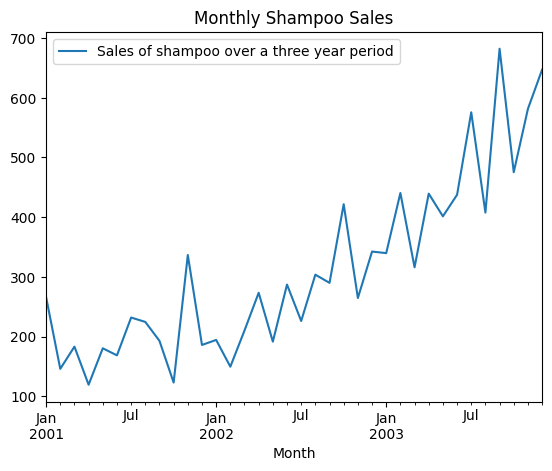

In [5]:
df.plot()
# plt.title("Monthly Passengers")
# plt.title("Monthly FMAC-HPI Sales")
plt.title("Monthly Shampoo Sales")
plt.show()

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_19644\1724385794.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  df_qtr = df.resample('Q').sum()


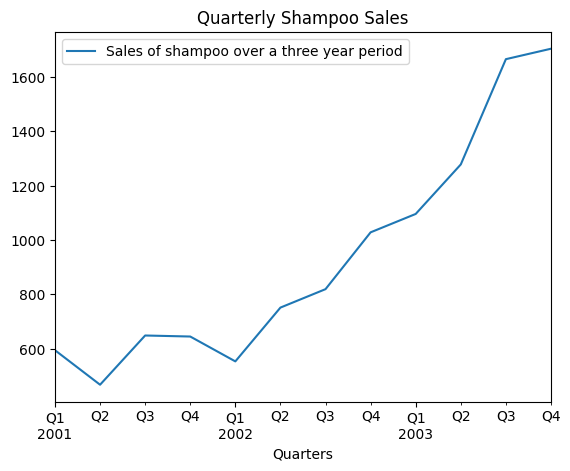

In [6]:
df_qtr = df.resample('Q').sum()
df_qtr.index.rename('Quarter', inplace=True)
df_qtr.plot()

# plt.title("Quarterly Passengers")
# plt.title("Quarterly FMAC-HPI Sales")
plt.title("Quarterly Shampoo Sales")
plt.xlabel("Quarters")
plt.show()

In [ ]:
################################## Simple Exponential Smoothing ######################################################
filterwarnings('ignore')

alpha = 0.8
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(y_train)

fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
print(fit1.params)
rms=sqrt(mean_squared_error(y_test,fcast1))
print(rms)  

#plot
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast') #Graph on the last fcast1 value
plt.legend(loc='best')
plt.show()

In [ ]:
############################################### Holt's Linear Method ##########################################################
alpha = 0.5
beta = 0.01

from statsmodels.tsa.api import Holt
holt = Holt(y_trn_gdp)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend=beta)

fcast1 = fit1.forecast(len(y_tst_gdp))



#plot
y_trn_gdp.plot(color='blue',label='Train')
y_tst_gdp.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
rms=sqrt(mean_squared_error(y_tst_gdp, fcast1))
print(rms)

plt.text(25,5200, " RMSE= "+str(rms))
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

In [ ]:
############################################### Holt's Exponential Method ##########################################################
alpha = 0.1
beta = 1

from statsmodels.tsa.api import Holt
holt = Holt(y_trn_gdp, exponential=True)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend=beta)

fcast1 = fit1.forecast(len(y_tst_gdp))

#plot
y_trn_gdp.plot(color='blue',label='Train')
y_tst_gdp.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
rms=sqrt(mean_squared_error(y_tst_gdp, fcast1))
print(rms)

plt.text(25,6000, " RMSE= "+str(rms))
plt.title("Holt's Exponential Trend")
plt.legend(loc='best')
plt.show()

rms=sqrt(mean_squared_error(y_tst_gdp, fcast1))
print(rms)

In [ ]:
# Additive

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma = 0.8, 0.8, 0.8 #0.8, 0.02, 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add')
fit1 = hw_add.fit() #without tuning RMSE = 11.92 #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)

plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend()
plt.show()

In [ ]:
# Additive and damped

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma, phi = 0.8, 0.8, 0.8,0.1 #0.8, 0.02, 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add', damped_trend=phi)
fit1 = hw_add.fit() #without tuning RMSE = 11.92 #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)

plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend()
plt.show()

In [ ]:
# Multiplicative

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma = 0.8, 0.8, 0.8 #0.8, 0.02, 0.1 #if tuned, it gives better values =>RMSE = 18.14
hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='mul') #added damping = True => RMSE = 17.1
fit1 = hw_mul.fit() #without tuning RMSE = 18.14 #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)

plt.text(100,600, "RMSE="+str(error))
plt.title("HW Multiplicative Trend and Seasonal Method")
plt.legend()
plt.show()

In [ ]:

# Multiplicative and Damping

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma, phi = 0.8, 0.8, 0.8,0.1 #0.8, 0.02, 0.1 #if tuned, it gives better values =>RMSE = 18.14
hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='mul', damped_trend=phi) #added damping = True => RMSE = 17.1
fit1 = hw_mul.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma) #without tuning RMSE = 18.14 #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)

plt.text(100,600, "RMSE="+str(error))
plt.title("HW Multiplicative Trend and Seasonal Method")
plt.legend()
plt.show()